<a href="https://colab.research.google.com/github/Laura-Neff/RegressionUsingCategoricalData/blob/main/RegressionUsingCategoricalData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

Diamonds Dataset
Source : https://www.kaggle.com/shivam2503/diamonds
price price in US dollars ($326--$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

In [ ]:
data = pd.read_csv('diamonds.csv', index_col=0)

data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
data.shape
#very large

(53940, 10)

Taking fraction of data
- Only taking 20% data of actual data

In [ ]:
data = data.sample(frac=0.2)
#we want to only use 20% of original data because the original data is too large to work with on our local machine

In [ ]:
data.shape

(10788, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10788 entries, 31545 to 41254
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    10788 non-null  float64
 1   cut      10788 non-null  object 
 2   color    10788 non-null  object 
 3   clarity  10788 non-null  object 
 4   depth    10788 non-null  float64
 5   table    10788 non-null  float64
 6   price    10788 non-null  int64  
 7   x        10788 non-null  float64
 8   y        10788 non-null  float64
 9   z        10788 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 927.1+ KB


Checking NULL values

In [ ]:
data.reset_index(inplace=True, drop=True)

data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.30,Ideal,E,VVS2,61.6,58.0,766,4.28,4.33,2.65
1,0.38,Very Good,G,SI1,62.0,54.8,755,4.64,4.67,2.89
2,1.15,Very Good,E,SI2,61.7,60.0,4250,6.70,6.78,4.16
3,1.27,Premium,I,SI1,62.3,56.0,5547,6.93,6.85,4.29
4,1.63,Good,I,SI1,63.7,58.0,9556,7.40,7.48,4.74


Finding correlations between features

In [ ]:
correlation = data.corr()

correlation

,carat,depth,table,price,x,y,z
carat,1.000000,0.019727,0.192303,0.923274,0.977244,0.951324,0.966450
depth,0.019727,1.000000,-0.294362,-0.016502,-0.034824,-0.037107,0.084504
table,0.192303,-0.294362,1.000000,0.131090,0.205251,0.192025,0.164891
price,0.923274,-0.016502,0.131090,1.000000,0.886016,0.865332,0.873666
x,0.977244,-0.034824,0.205251,0.886016,1.000000,0.973331,0.983224
y,0.951324,-0.037107,0.192025,0.865332,0.973331,1.000000,0.963950
z,0.966450,0.084504,0.164891,0.873666,0.983224,0.963950,1.000000


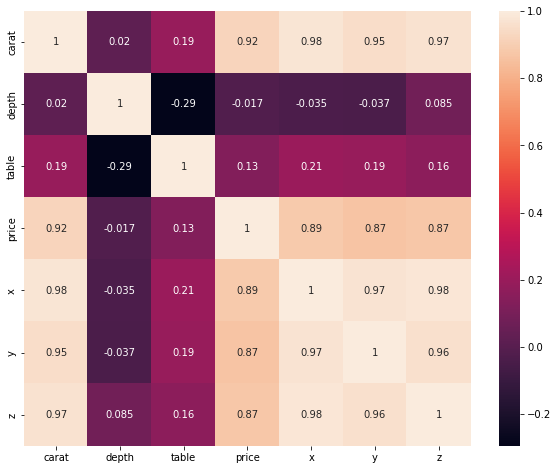

In [ ]:
plt.subplots(figsize=(10, 8))
sns.heatmap(correlation, annot=True)

plt.show()

Find unique values

In [ ]:
data['cut'].unique()

array(['Ideal', 'Very Good', 'Premium', 'Good', 'Fair'], dtype=object)

In [ ]:
data['color'].unique()

array(['E', 'G', 'I', 'H', 'F', 'D', 'J'], dtype=object)

In [ ]:
data['clarity'].unique()

array(['VVS2', 'SI1', 'SI2', 'VS1', 'VS2', 'IF', 'VVS1', 'I1'],
      dtype=object)

In [ ]:
data['cut'].value_counts()

Ideal        4275
Premium      2785
Very Good    2401
Good         1007
Fair          320
Name: cut, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


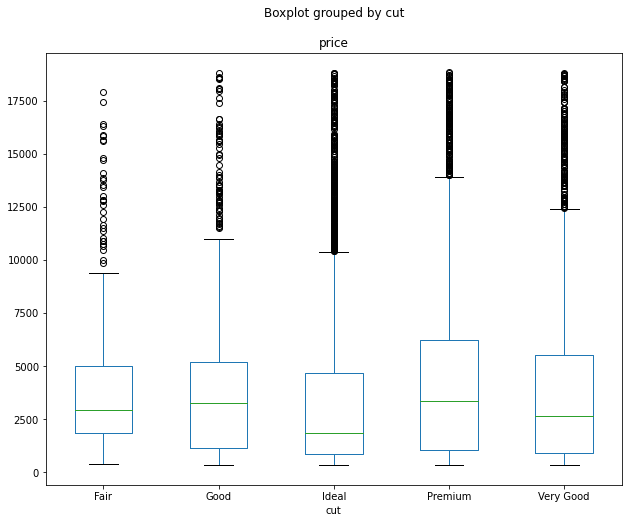

In [ ]:
data.boxplot(by ='cut', column =['price'], grid = False, figsize=(10, 8)) 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


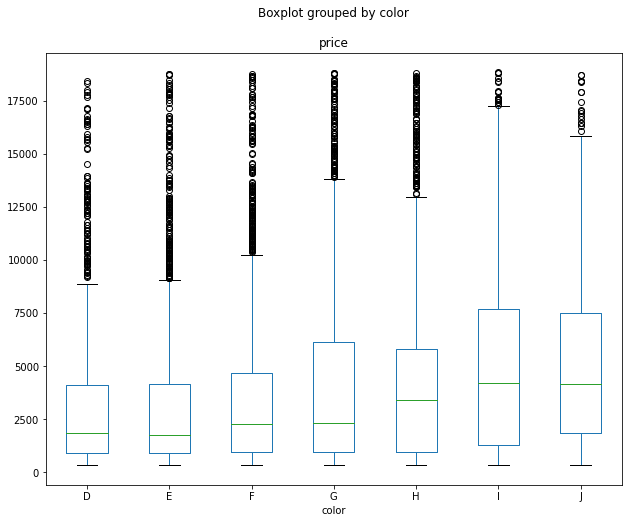

In [ ]:
data.boxplot(by ='color', column =['price'], grid = False, figsize=(10, 8)) 

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


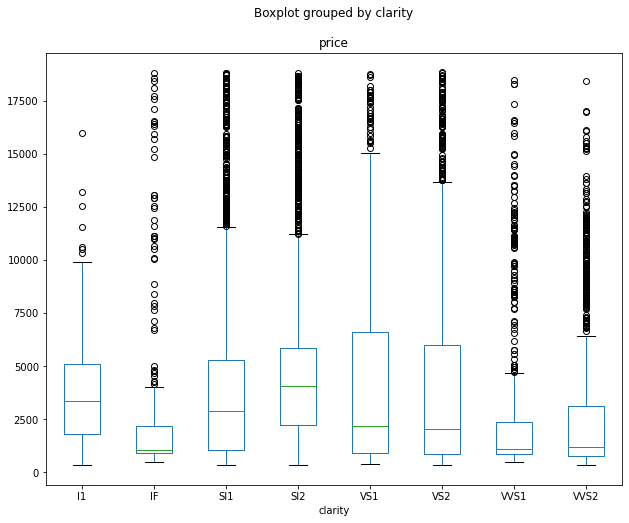

In [ ]:
data.boxplot(by ='clarity', column =['price'], grid = False, figsize=(10, 8)) 

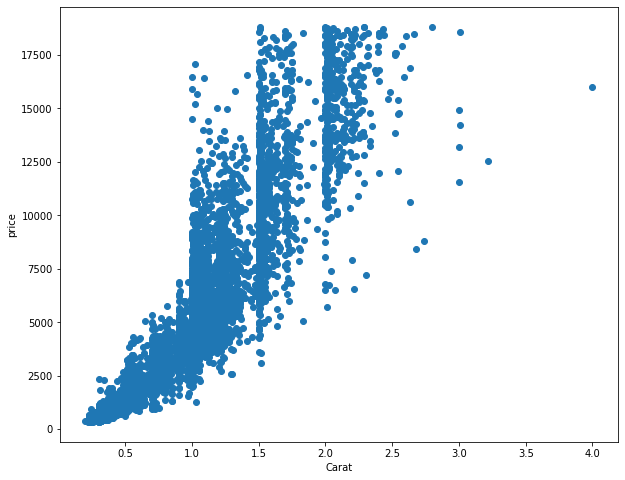

In [ ]:
plt.subplots(figsize=(10, 8))

plt.scatter(data['carat'], data['price'])

plt.xlabel("Carat")
plt.ylabel("price")

plt.show()

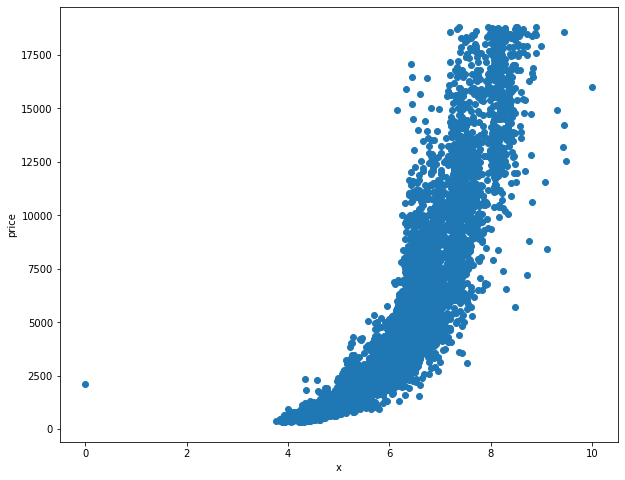

In [ ]:
plt.subplots(figsize=(10, 8))

plt.scatter(data['x'], data['price'])

plt.xlabel("x")
plt.ylabel("price")

plt.show()

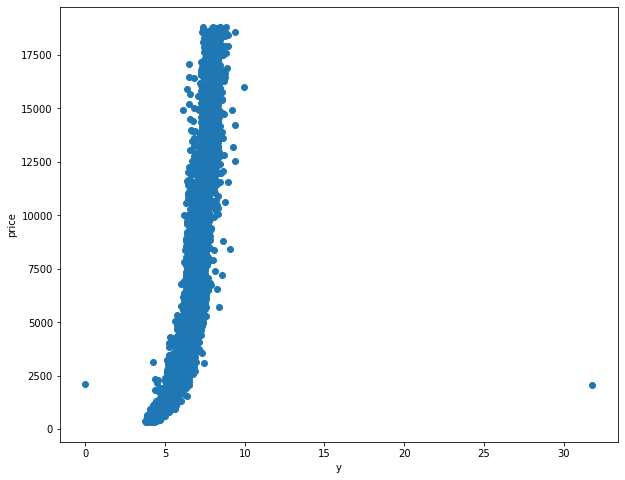

In [ ]:
plt.subplots(figsize=(10, 8))

plt.scatter(data['y'], data['price'])

plt.xlabel("y")
plt.ylabel("price")

plt.show()

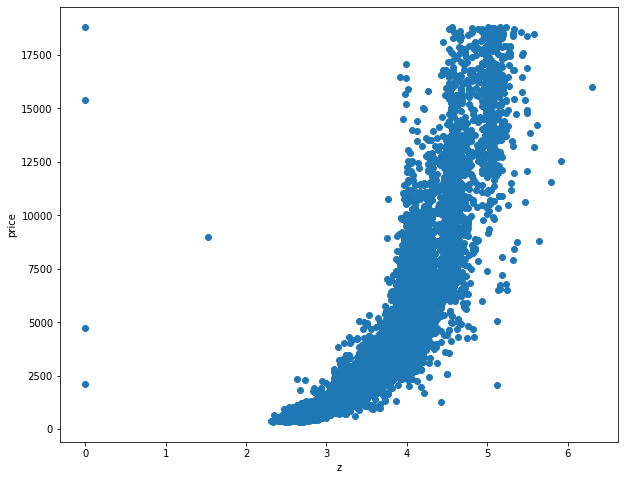

In [ ]:
plt.subplots(figsize=(10, 8))

plt.scatter(data['z'], data['price'])

plt.xlabel("z")
plt.ylabel("price")

plt.show()

Converting categorical into numerical
- using label encoder and one hot encoder

In [ ]:
clarity_dict = {"IF" : 7, "VVS1" : 6, "VVS2" : 5, "VS1" : 4, "VS2" : 3, "SI1" :  2, "SI2" : 1, "I1" : 0}

data['clarity'].replace(clarity_dict, inplace=True)

data.head()

#when you want to convert categorical data to ordinal form (rather than nominal), use a dictionary manually to specify your numeric ids for the corresponding categories

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.30,Ideal,E,5,61.6,58.0,766,4.28,4.33,2.65
1,0.38,Very Good,G,2,62.0,54.8,755,4.64,4.67,2.89
2,1.15,Very Good,E,1,61.7,60.0,4250,6.70,6.78,4.16
3,1.27,Premium,I,2,62.3,56.0,5547,6.93,6.85,4.29
4,1.63,Good,I,2,63.7,58.0,9556,7.40,7.48,4.74


In [ ]:
data = pd.get_dummies(data, columns=['cut', 'color'])

data.head()

#categorical data that is either nominal or ordinal? one-hot encoding is the way to go

,carat,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.30,5,61.6,58.0,766,4.28,4.33,2.65,0,0,1,0,0,0,1,0,0,0,0,0
1,0.38,2,62.0,54.8,755,4.64,4.67,2.89,0,0,0,0,1,0,0,0,1,0,0,0
2,1.15,1,61.7,60.0,4250,6.70,6.78,4.16,0,0,0,0,1,0,1,0,0,0,0,0
3,1.27,2,62.3,56.0,5547,6.93,6.85,4.29,0,0,0,1,0,0,0,0,0,0,1,0
4,1.63,2,63.7,58.0,9556,7.40,7.48,4.74,0,1,0,0,0,0,0,0,0,0,1,0


In [ ]:
NUMERIC_FEATURES = ['carat', 'depth', 'table', 'x', 'y', 'z']

numeric_df = data[NUMERIC_FEATURES]

numeric_df.describe()

#extract our already numeric data into another data frame to analyze

,carat,depth,table,x,y,z
count,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000
mean,0.802298,61.754329,57.472265,5.740581,5.744571,3.543651
std,0.476436,1.426990,2.222169,1.127911,1.147299,0.698266
min,0.200000,53.300000,50.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.720000,4.720000,2.910000
50%,0.710000,61.900000,57.000000,5.700000,5.720000,3.530000
75%,1.050000,62.500000,59.000000,6.550000,6.550000,4.040000
max,4.000000,78.200000,71.000000,10.010000,31.800000,6.310000


In [ ]:
from sklearn.preprocessing import scale

numeric_array = scale(numeric_df)

numeric_array[:5]

#standardize our data by subtracting the mean and dividing by standard deviation
#because neural networks don't work well with data on different scales

array([[-1.05432997, -0.10815497,  0.23749728, -1.29500336, -1.23301459,
        -1.27987383],
       [-0.88640892,  0.17216836, -1.20260426, -0.97581453, -0.93665264,
        -0.93614947],
       [ 0.72983125, -0.03807413,  1.13756074,  0.85065491,  0.90253473,
         0.88272531],
       [ 0.98171283,  0.38241086, -0.66256618,  1.05458111,  0.96355042,
         1.06890934],
       [ 1.73735759,  1.36354251,  0.23749728,  1.47129987,  1.51269167,
         1.71339252]])

In [ ]:
numeric_df = pd.DataFrame(numeric_array, columns=numeric_df.columns)

numeric_df.describe()

#means close to 0, std close to 1

,carat,depth,table,x,y,z
count,1.078800e+04,1.078800e+04,1.078800e+04,1.078800e+04,1.078800e+04,1.078800e+04
mean,1.593913e-16,2.388894e-15,-3.550079e-15,3.253690e-16,-8.298886e-17,-6.915739e-16
std,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00,1.000046e+00
min,-1.264231e+00,-5.924864e+00,-3.362757e+00,-5.089804e+00,-5.007271e+00,-5.075164e+00
25%,-8.444287e-01,-5.286400e-01,-6.625662e-01,-9.048837e-01,-8.930700e-01,-9.075058e-01
50%,-1.937346e-01,1.020875e-01,-2.125345e-01,-3.598074e-02,-2.141722e-02,-1.955116e-02
75%,5.199299e-01,5.225725e-01,6.875290e-01,7.176596e-01,7.020546e-01,7.108631e-01
max,6.712019e+00,1.152526e+01,6.087910e+00,3.785419e+00,2.271129e+01,3.961923e+00


In [ ]:
data.head()

,carat,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.30,5,61.6,58.0,766,4.28,4.33,2.65,0,0,1,0,0,0,1,0,0,0,0,0
1,0.38,2,62.0,54.8,755,4.64,4.67,2.89,0,0,0,0,1,0,0,0,1,0,0,0
2,1.15,1,61.7,60.0,4250,6.70,6.78,4.16,0,0,0,0,1,0,1,0,0,0,0,0
3,1.27,2,62.3,56.0,5547,6.93,6.85,4.29,0,0,0,1,0,0,0,0,0,0,1,0
4,1.63,2,63.7,58.0,9556,7.40,7.48,4.74,0,1,0,0,0,0,0,0,0,0,1,0


In [ ]:
data.drop(NUMERIC_FEATURES, inplace=True, axis=1)

data.head()

,clarity,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,5,766,0,0,1,0,0,0,1,0,0,0,0,0
1,2,755,0,0,0,0,1,0,0,0,1,0,0,0
2,1,4250,0,0,0,0,1,0,1,0,0,0,0,0
3,2,5547,0,0,0,1,0,0,0,0,0,0,1,0
4,2,9556,0,1,0,0,0,0,0,0,0,0,1,0


In [ ]:
numeric_df.head()

,carat,depth,table,x,y,z
0,-1.054330,-0.108155,0.237497,-1.295003,-1.233015,-1.279874
1,-0.886409,0.172168,-1.202604,-0.975815,-0.936653,-0.936149
2,0.729831,-0.038074,1.137561,0.850655,0.902535,0.882725
3,0.981713,0.382411,-0.662566,1.054581,0.963550,1.068909
4,1.737358,1.363543,0.237497,1.471300,1.512692,1.713393


In [ ]:
data.shape, numeric_df.shape

((10788, 14), (10788, 6))

In [ ]:
data = pd.concat([data, numeric_df], axis=1)

data.shape

#drop previous non-standardized numeric features and replace with the standardized ones

(10788, 20)

In [ ]:
data.head()

,clarity,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,carat,depth,table,x,y,z
0,5,766,0,0,1,0,0,0,1,0,0,0,0,0,-1.054330,-0.108155,0.237497,-1.295003,-1.233015,-1.279874
1,2,755,0,0,0,0,1,0,0,0,1,0,0,0,-0.886409,0.172168,-1.202604,-0.975815,-0.936653,-0.936149
2,1,4250,0,0,0,0,1,0,1,0,0,0,0,0,0.729831,-0.038074,1.137561,0.850655,0.902535,0.882725
3,2,5547,0,0,0,1,0,0,0,0,0,0,1,0,0.981713,0.382411,-0.662566,1.054581,0.963550,1.068909
4,2,9556,0,1,0,0,0,0,0,0,0,0,1,0,1.737358,1.363543,0.237497,1.471300,1.512692,1.713393


In [ ]:
data.to_csv('diamonds_processed.csv', index=False)

##Spilting into train and test data

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('price', axis=1)
Y = data['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [ ]:
x_train.shape, y_train.shape

((8630, 19), (8630,))

In [ ]:
x_test.shape, y_test.shape

((2158, 19), (2158,))

##Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_prediction = linear_regression.predict(x_test)

y_prediction

array([5006.98048554, 1564.93024492, 4962.25235873, ..., 7044.47711983,
        347.91881445, 4215.61539777])

##Find train and test score

In [ ]:
train_score = linear_regression.score(x_train, y_train)

print("Training score : ", train_score)

Training score :  0.91368067877994


In [ ]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_prediction)

print("Testing score : ", score)

Testing score :  0.9135565499267981
